In [72]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [73]:
num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
    mean=[0,3],
    cov=[[1,0.5], [0.5,1]],
    size=num_samples_per_class
)

positive_samples = np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1,0.5], [0.5,1]],
    size=num_samples_per_class
)

In [74]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((
    np.zeros((num_samples_per_class, 1), dtype="float32"),
    np.ones((num_samples_per_class, 1), dtype="float32")))

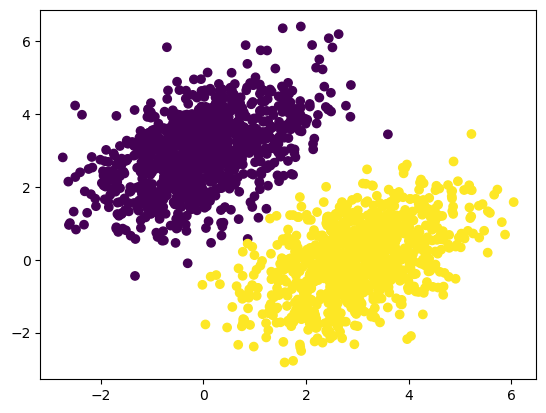

In [75]:
plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.show()

In [76]:
input_dim = 2 # represents a point (x,y) co-ordinate
output_dim =1 # represent weather point belongs to 0 or 1 (binary classification) [true or false]

W = tf.Variable(initial_value = tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value = tf.zeros(shape=(output_dim,)))
print(inputs)
print(W)

[[ 1.7019801   3.5802054 ]
 [ 0.8252737   3.5866444 ]
 [ 0.19203252  3.4188306 ]
 ...
 [ 2.6377287  -0.95881766]
 [ 3.4004102  -0.03927364]
 [ 2.9572833   0.7797486 ]]
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.54309213],
       [0.06613457]], dtype=float32)>


In [77]:
def model(inputs):
    return tf.matmul(inputs, W) + b #For two matrices to be multiplied, the number of columns in the first matrix must equal the number of rows in the second matrix

In [78]:
def square_loss(y_pred, y_true):
    per_sample_losses = tf.square(y_pred, y_true)
    return tf.reduce_mean(per_sample_losses)

In [79]:
LR = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_of_loss_wrt_W, grad_of_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_of_loss_wrt_W * LR)
    b.assign_sub(grad_of_loss_wrt_b * LR)
    return loss

In [94]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.0001
Loss at step 1: 0.0000
Loss at step 2: 0.0000
Loss at step 3: 0.0000
Loss at step 4: 0.0000
Loss at step 5: 0.0000
Loss at step 6: 0.0000
Loss at step 7: 0.0000
Loss at step 8: 0.0000
Loss at step 9: 0.0000
Loss at step 10: 0.0000
Loss at step 11: 0.0000
Loss at step 12: 0.0000
Loss at step 13: 0.0000
Loss at step 14: 0.0000
Loss at step 15: 0.0000
Loss at step 16: 0.0000
Loss at step 17: 0.0000
Loss at step 18: 0.0000
Loss at step 19: 0.0000
Loss at step 20: 0.0000
Loss at step 21: 0.0000
Loss at step 22: 0.0000
Loss at step 23: 0.0000
Loss at step 24: 0.0000
Loss at step 25: 0.0000
Loss at step 26: 0.0000
Loss at step 27: 0.0000
Loss at step 28: 0.0000
Loss at step 29: 0.0000
Loss at step 30: 0.0000
Loss at step 31: 0.0000
Loss at step 32: 0.0000
Loss at step 33: 0.0000
Loss at step 34: 0.0000
Loss at step 35: 0.0000
Loss at step 36: 0.0000
Loss at step 37: 0.0000
Loss at step 38: 0.0000
Loss at step 39: 0.0000


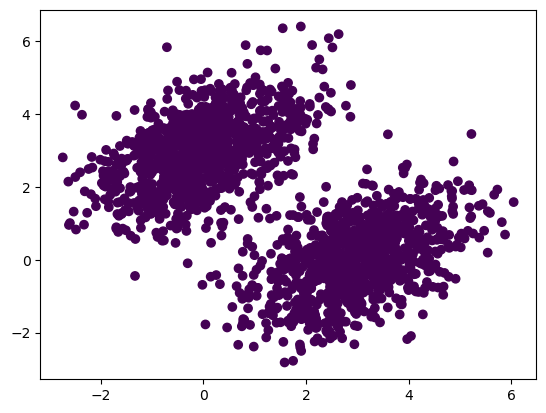

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.00059962],
       [0.00060224]], dtype=float32)>


In [95]:
predictions = model(inputs)
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0] > 0.5)
plt.show()
print(W)

In [ ]:
# x = np.linspace(-1,4,100)
# y = -W[0] / W[1] * x + (0.5 - b) / W[1]
# plt.plot(x,y,"-r")
# plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0] == 0.5)
# plt.show()